**Prueba de K-means.**<br><br>
Este ejercicio se basa en una práctica de K-means para entender su uso en Python.<br>
Se implementará un clasificador K-means cno los datos de famosos situados en data (fichero analisis.csv).

In [180]:
# Primero hacemos los imports necesarios.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
# Importamos la clase para hacer kmean
from sklearn.cluster import KMeans
# Importamos la libreria para obtener las distancias.
from sklearn.metrics import pairwise_distances_argmin_min
# Importamos los ejes 4D
from mpl_toolkits.mplot3d import Axes3D

In [181]:
# Declaramos las constantes
CSV_FILE = "./data/analisis.csv"
FIRST_N_ROWS = 20
N_CLUSTERS = 20

Primero tenemos que cargar  los datos...

In [182]:
dataFrame = pd.read_csv(CSV_FILE)

Imprimimos el resumen de los datos cargados

In [183]:
dataFrame.describe()

,op,co,ex,ag,ne,wordcount,categoria
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,44.414591,22.977135,40.764428,22.918528,8.000098,98.715484,4.050000
std,8.425723,5.816851,7.185246,7.657122,3.039248,44.714071,2.658839
min,30.020465,7.852756,18.693542,9.305985,1.030213,5.020800,1.000000
25%,38.206484,19.740299,36.095722,17.050993,6.086144,66.218475,2.000000
50%,44.507091,22.466718,41.457492,21.384554,7.839722,94.711400,3.500000
75%,49.365923,26.091606,45.197769,28.678866,9.758189,119.707925,7.000000
max,71.696129,49.637863,59.824844,40.583162,23.978462,217.183200,9.000000


Imprimimos los N primeros registros...

In [184]:
print(f"{dataFrame.head(FIRST_N_ROWS)}")

            usuario         op         co         ex         ag         ne  \
0      3gerardpique  34.297953  28.148819  41.948819  29.370315   9.841575   
1   aguerosergiokun  44.986842  20.525865  37.938947  24.279098  10.362406   
2    albertochicote  41.733854  13.745417  38.999896  34.645521   8.836979   
3     AlejandroSanz  40.377154  15.377462  52.337538  31.082154   5.032231   
4    alfredocasero1  36.664677  19.642258  48.530806  31.138871   7.305968   
5       alo_oficial  33.531771  16.183958  43.211667  25.786667  11.930417   
6    andresiniesta8  31.851102  13.735591  47.182362  19.594331   6.905591   
7    andykusnetzoff  31.865118  16.588110  55.377559  36.258346   7.464646   
8       andyroddick  46.393488  25.451163  39.930310  16.658062   8.452791   
9       andy_murray  39.436667  26.135303  32.966288  32.291591  10.956591   
10  AngelAlessandra  52.750992  24.706565  41.698855  17.057176   8.279847   
11  antoniobanderas  41.328182  20.241212  39.173333  21.070505 

El fichero contiene 9 categorias: <br>
<ol> 
    <li>Actor/ Actriz</li>
    <li>Cantante</li>
    <li>Modelo</li>
    <li>Tv, series</li>
    <li>Radio</li>
    <li>Tecnologia</li>
    <li>Deportes</li>
    <li>Politica</li>
    <li>Escritor</li>
</ol><br>
Cada categoria tiene los siguientes registros:

In [185]:
print(f"{dataFrame.groupby('categoria').size()}")

categoria
1    27
2    34
3     9
4    19
5     4
6     8
7    17
8    16
9     6
dtype: int64


Vamos a ver como están distribuidos los datos en las categorias del dataFrame ( menos la categoria que es lo que hemos visto antes...)

array([[<Axes: title={'center': 'op'}>, <Axes: title={'center': 'co'}>],
       [<Axes: title={'center': 'ex'}>, <Axes: title={'center': 'ag'}>],
       [<Axes: title={'center': 'ne'}>,
        <Axes: title={'center': 'wordcount'}>]], dtype=object)

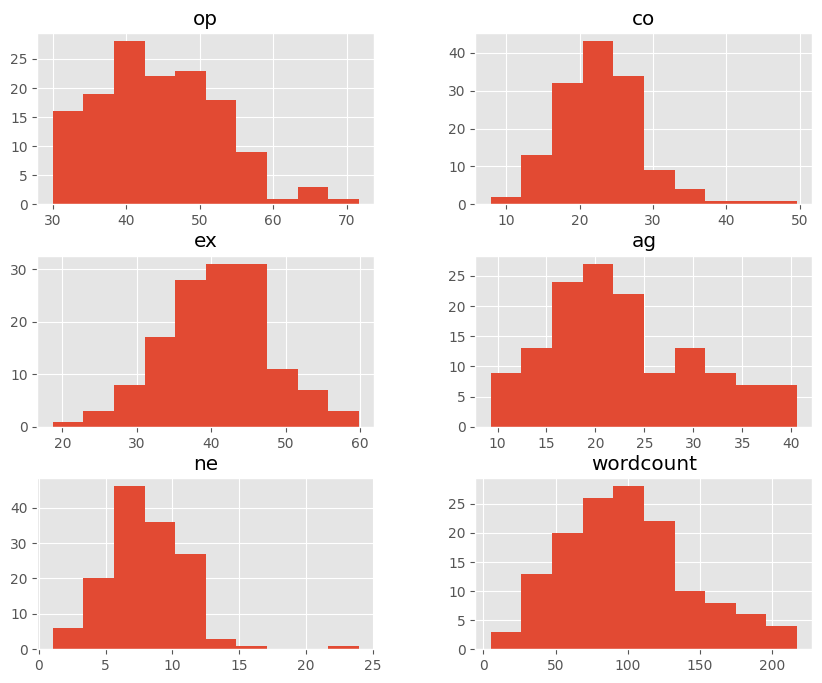

In [186]:
dataFrame.drop(['categoria'], axis = 'columns').hist(figsize=(10,8))

Vamos a hacer un plot Cruzado entre tres de sus carácterísticas a ver si encontramos algún tipo de relación entre las distintas columnas.

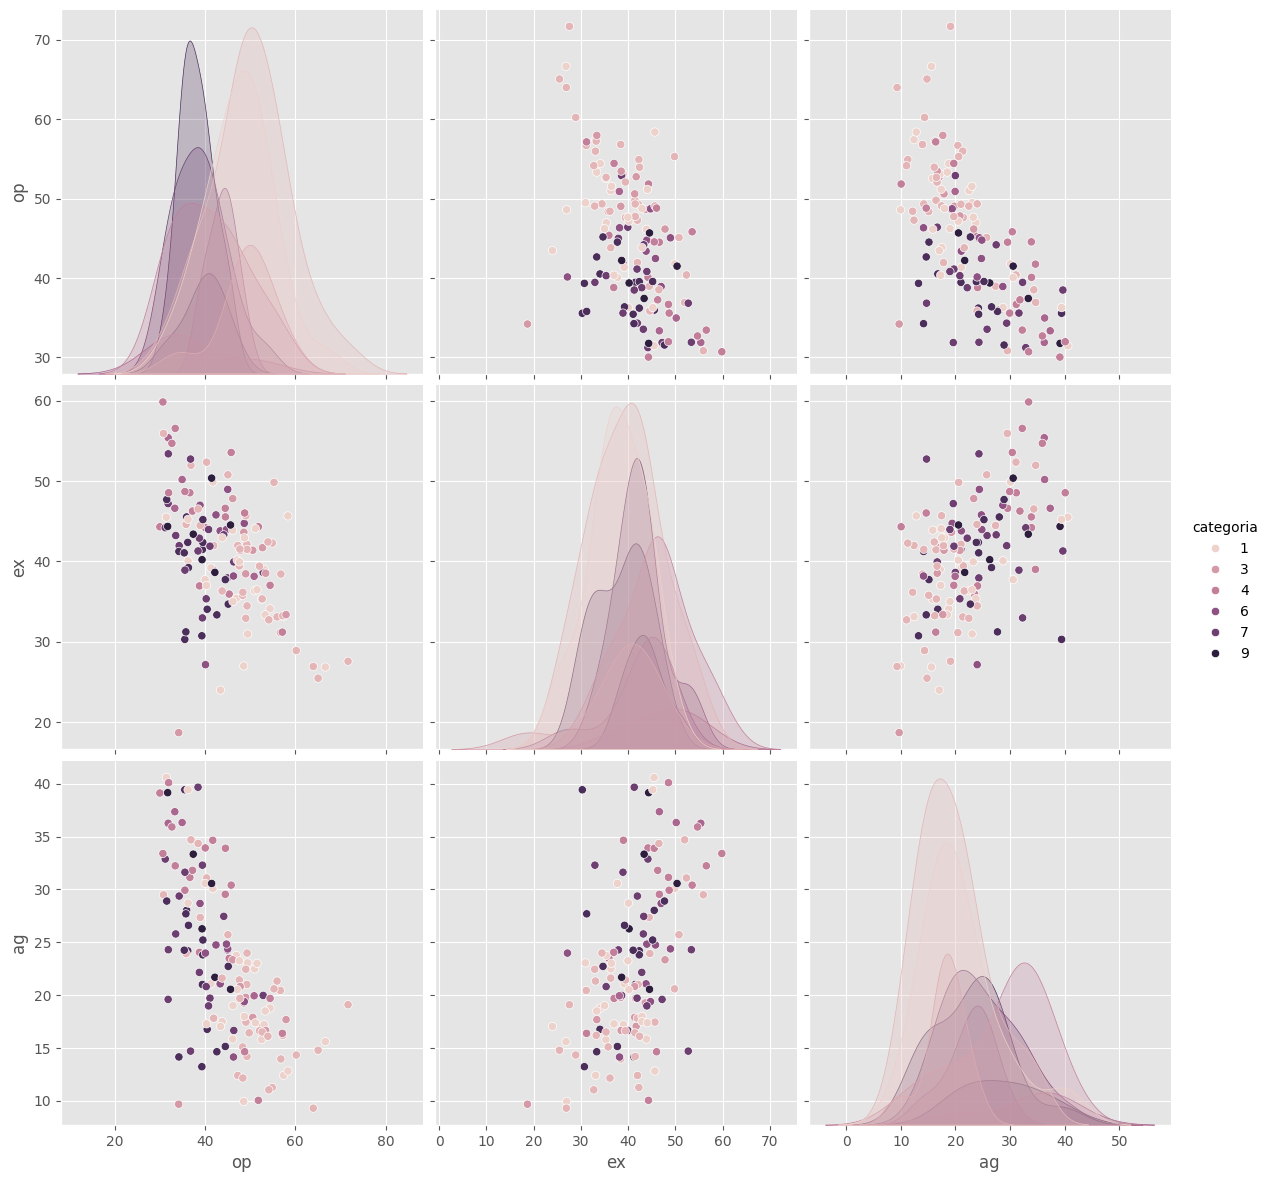

In [187]:
sb.pairplot(
    dataFrame.dropna(),
    hue = 'categoria',
    height = 4,
    vars = ["op", "ex", "ag"],
    kind = "scatter"
    )

Parece que no hay correlación alguna entre los usuarios y sus categorias y eso lo vemos en que las formas de las curvas no son similares. Cada uno crece en un punto diferente al resto, es decir, ninguna curva incluye a otra curva con el mismo comportamiento. (a priori)<br>
Vamos a pintar los datos como puntos en una gráfica

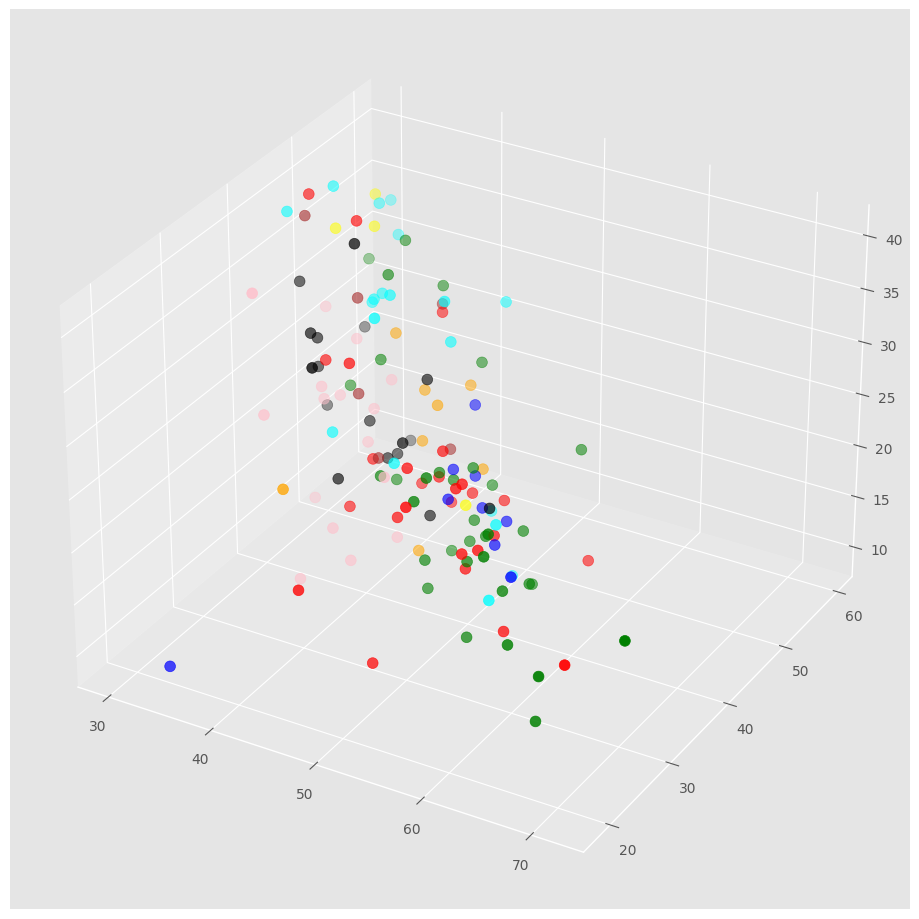

In [188]:
X = np.array(dataFrame[["op","ex","ag"]])
y = np.array(dataFrame['categoria'])

fig = plt.figure(figsize=(15,9))
# Plotamos en 3D
ax = Axes3D(fig)
# Un array de colores
colores= ['blue','red','green','blue','cyan','yellow','orange','black','pink','brown','purple']
asignar = []
# Para cada categoria, seleccionamos un color del "buffer" de colores.
for row in y:
    asignar.append(colores[row])

ax.scatter(X[:,0], X[:,1], X[:,2], c= asignar, s=60)
# He creado el eje pero no se lo he añadido a la figura.
fig.add_axes(ax)
plt.show()

Procedemos a encontrar el número óptimo de clusters bucando el "codo" el punto donde el score ya no aumenta significativamente.

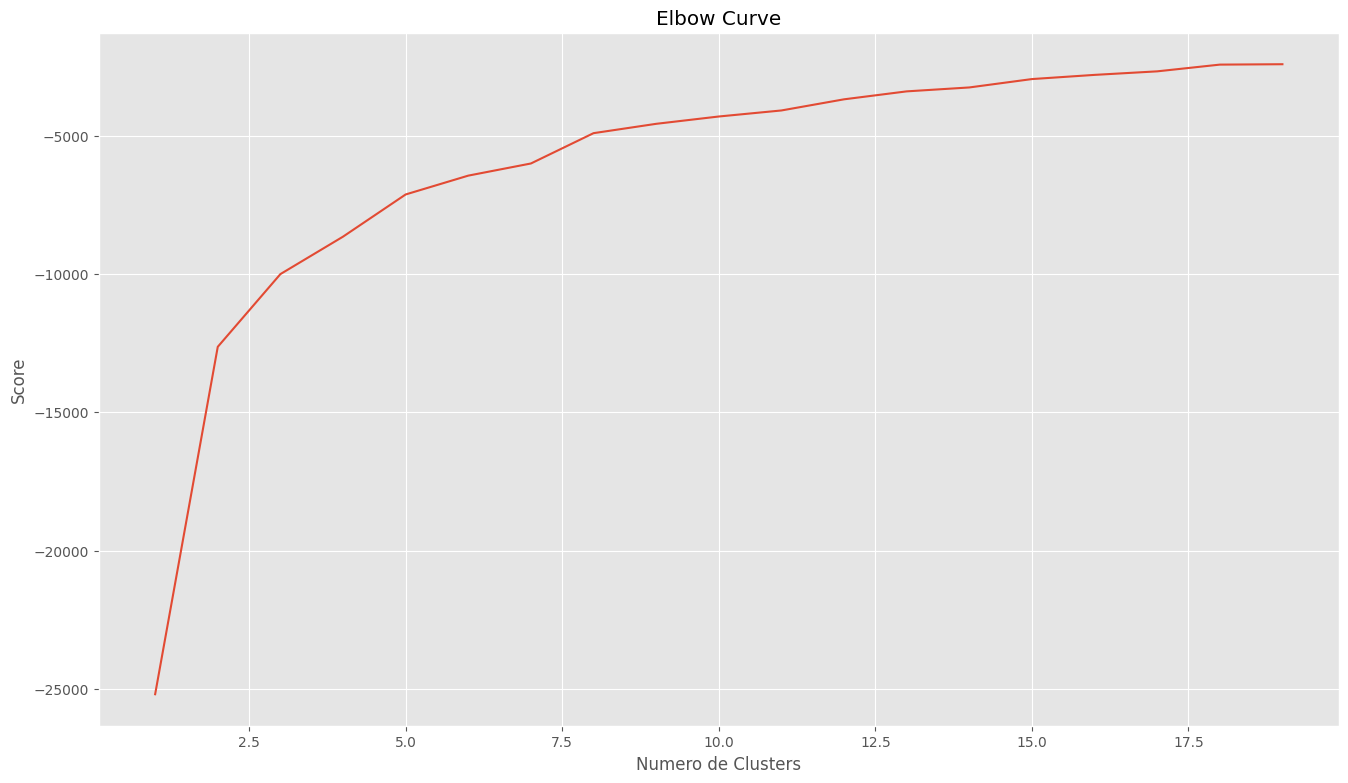

In [189]:
nc = range(1,N_CLUSTERS)
# Creamos los n clasificadores K means, uno por cada numero de cluster.
kmeans = [KMeans(n_clusters=i) for i in nc]
# Calculo el Score para cada clasificador creado. Para ello, entreno el Kmeans y luego le pido el score de los datos.
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
# Pasamos a plotar los scores
plt.plot(nc,score)
plt.xlabel("Numero de Clusters")
plt.ylabel("Score")
plt.title("Elbow Curve")
plt.show()

Viendo la gráfica... Podemos decir que a partir de 5 clusters, el score no aumenta significativamente por lo que solo aumentaríamos el coste computacional sin ganar mucho score. Nos quedamos con 5 clusters.

Ejecutamos el clasificador K-Means con 5 clusters

In [190]:
kmeans = KMeans(n_clusters= 5).fit(X)
# Obtenemos los centroides
centroids = kmeans.cluster_centers_
print(f"Centroides: {centroids}", end="\n\n")
labels = kmeans.labels_
print(f"Labels: {labels}", end="\n\n")

Centroides: [[58.58657531 31.02839375 15.6120435 ]
 [49.99285115 40.87133549 17.47411785]
 [39.74573696 43.70967146 23.46148586]
 [35.90241306 47.56828232 33.58748762]
 [42.73275924 33.0308789  21.11743814]]

Labels: [3 4 3 3 3 2 2 3 1 4 1 2 0 1 2 1 3 2 1 3 3 1 4 3 1 4 3 2 2 1 2 1 1 1 3 3 3
 3 2 4 2 2 2 2 1 0 1 1 3 3 1 2 3 0 3 0 4 1 4 0 4 4 1 0 2 2 0 0 1 3 2 4 1 1
 4 0 2 3 3 3 3 2 0 1 4 2 1 2 1 1 1 4 4 1 1 2 3 1 3 1 0 1 1 3 0 1 2 2 2 1 1
 3 3 3 2 1 4 0 3 2 4 3 1 4 0 4 4 1 1 4 1 1 4 2 0 3 3 0 1 3]



Graficamos el entrenamiento segun la clase asignada.

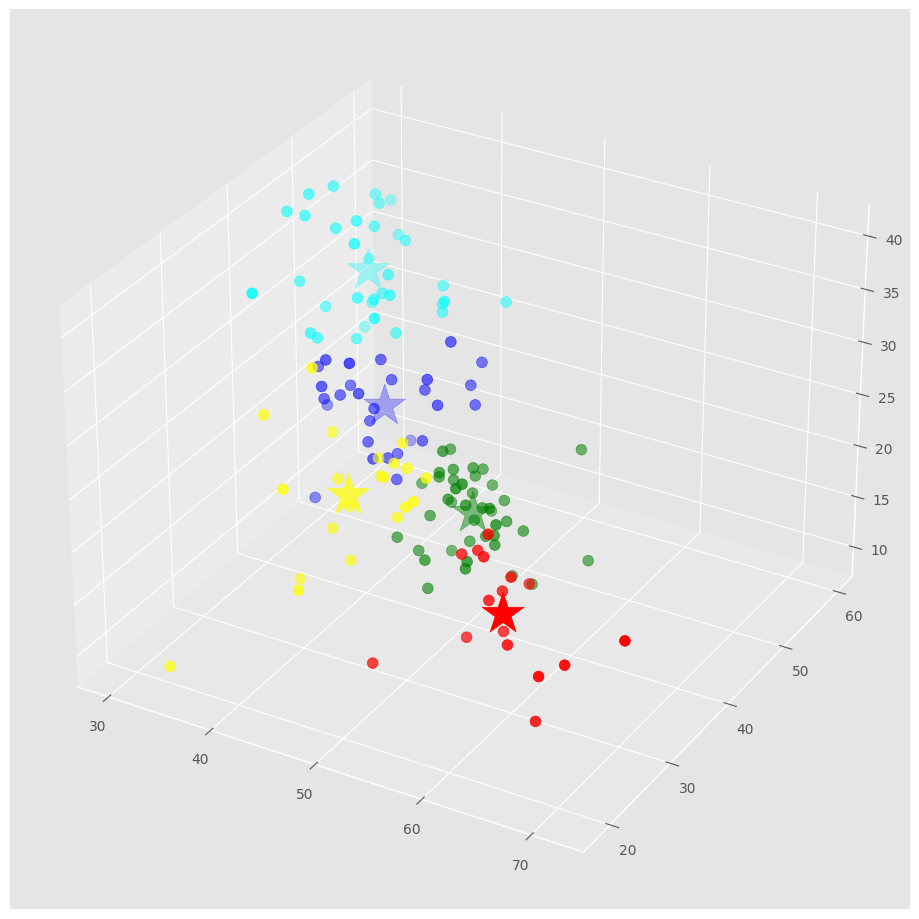

In [191]:
labels = kmeans.predict(X)
C = kmeans.cluster_centers_
colores = ['red', 'green', 'blue', 'cyan', 'yellow']
asignar = []
for row in labels:
    asignar.append(colores[row])
fig = plt.figure()
ax = Axes3D(fig)
# Plotamos los puntos con el color SEGUN la clasificacion
ax.scatter(X[:,0], X[:,1], X[:,2], c = asignar, s= 60)
ax.scatter(C[:,0], C[:,1], C[:,2], marker = '*', c= colores, s= 1000)
fig.add_axes(ax)
plt.show()

Vemos los centroides como estrellas y los puntos que le "pertenecen" en su mismo color.

Ahora plotamos los centroides y sus puntos en función de cada par de columnas de las 3 que hemos elegido.

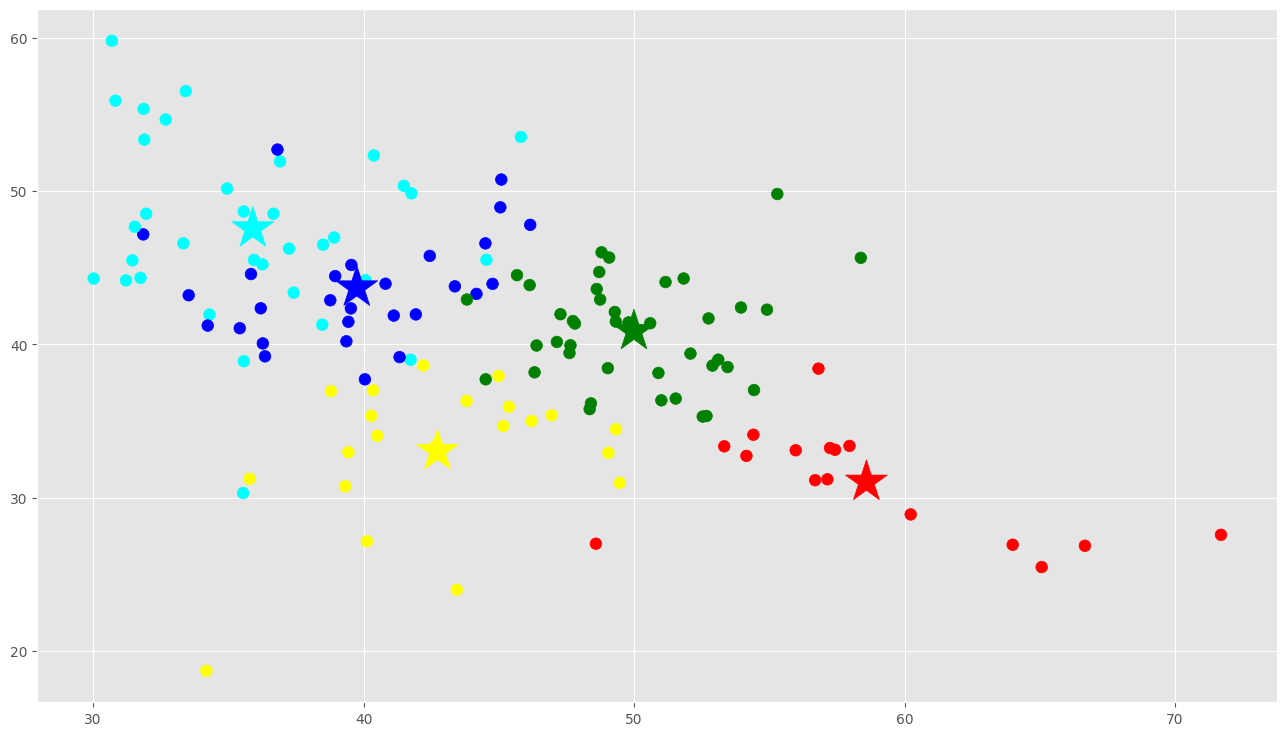

In [192]:
f1 = dataFrame['op'].values
f2 = dataFrame['ex'].values
# Plotamos los puntos de op respecto ex
plt.scatter(f1,f2, c = asignar, s= 70)
# Plotamos los centroides
plt.scatter(C[:,0], C[:,1], marker = '*', c = colores, s= 1000)
plt.show()

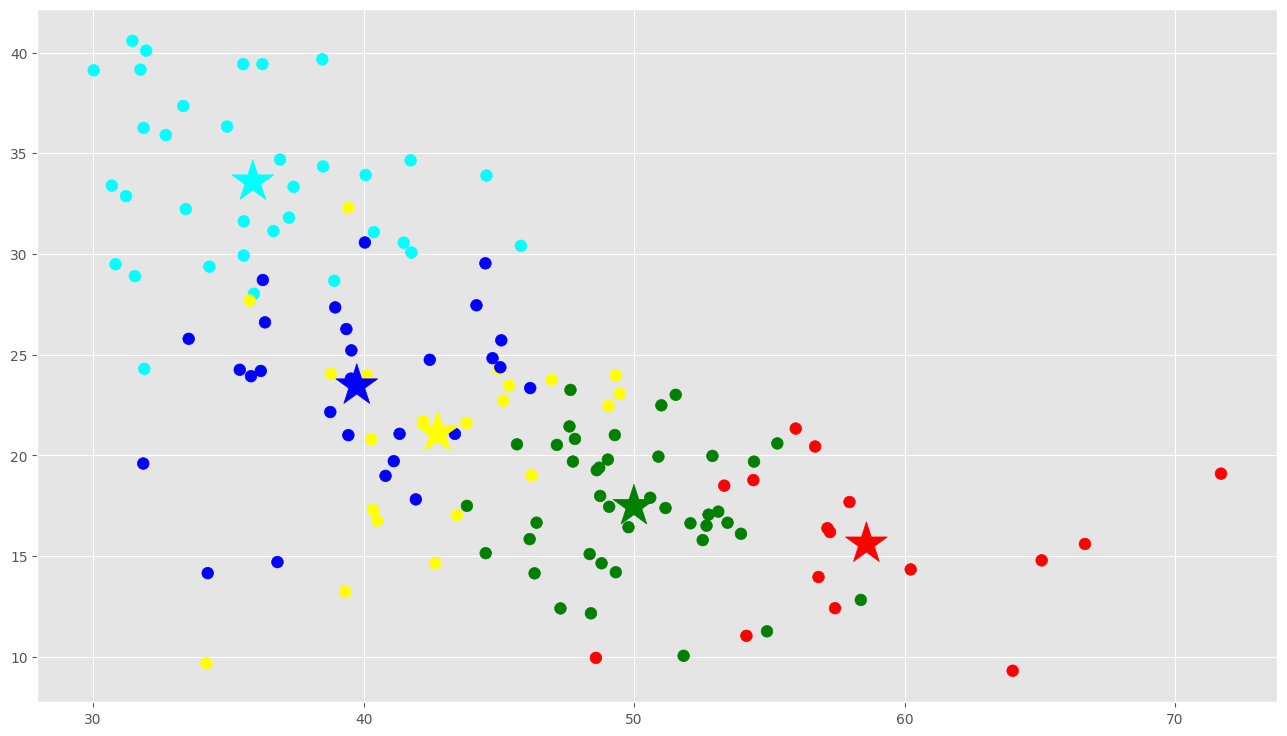

In [193]:
f1 = dataFrame['op'].values
f2 = dataFrame['ag'].values
# Plotamos los puntos de op respecto ex
plt.scatter(f1,f2, c = asignar, s= 70)
# Plotamos los centroides
plt.scatter(C[:,0], C[:,2], marker = '*', c = colores, s= 1000)
plt.show()

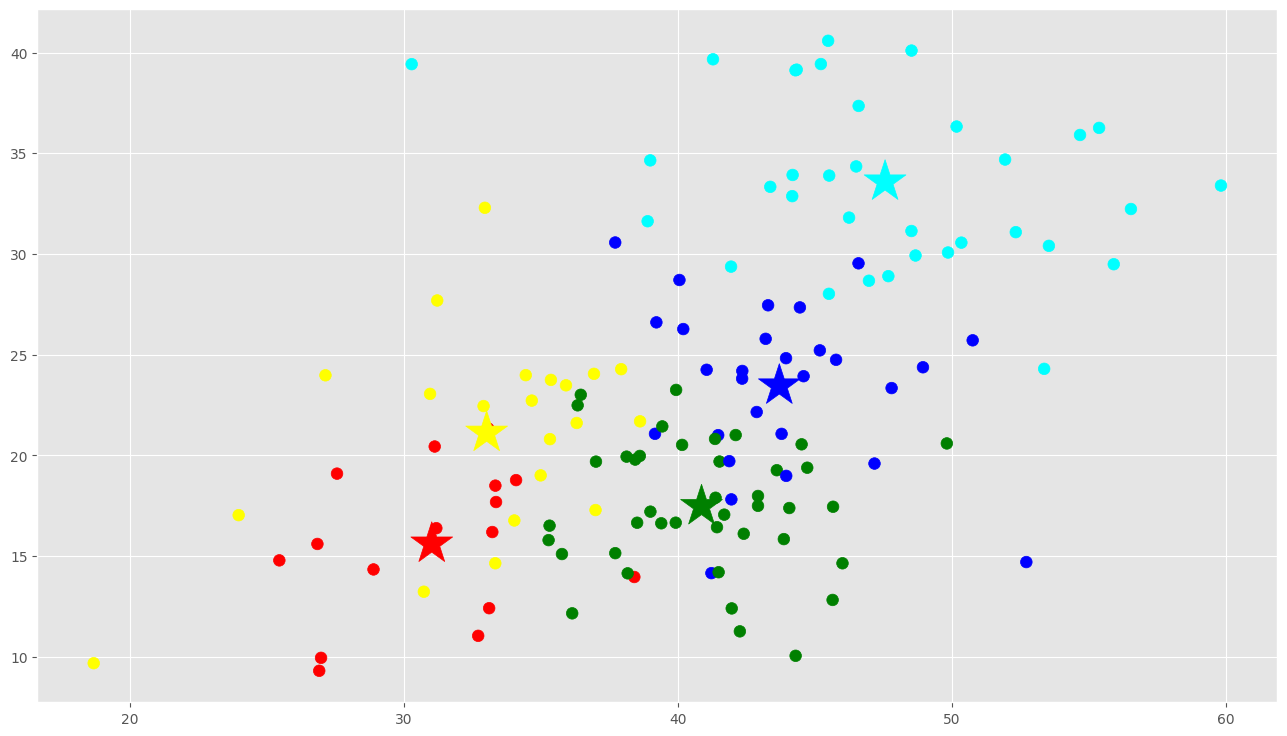

In [194]:
f1 = dataFrame['ex'].values
f2 = dataFrame['ag'].values
# Plotamos los puntos de op respecto ex
plt.scatter(f1,f2, c = asignar, s= 70)
# Plotamos los centroides
plt.scatter(C[:,1], C[:,2], marker = '*', c = colores, s= 1000)
plt.show()

Vemos que los centroides representan bastante bien a sus puntos.